In [4]:
from skimage import morphology
import skimage.io as sio
import cv2
import numpy as np
import matplotlib.pyplot as plt

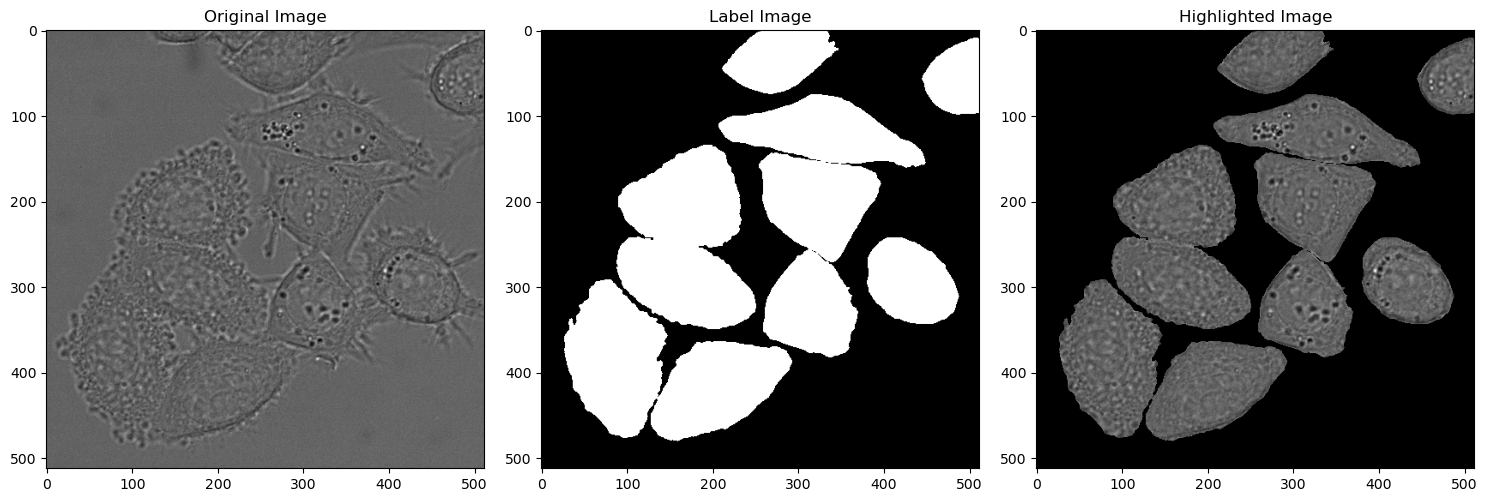

Unique values in the label image: [0. 1.]


In [5]:
def read_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return image

def read_label(label_path):
    label = sio.imread(label_path)
    label = np.where(label > 0, 1, 0).astype(np.float32)
    return label
    markers = np.zeros_like(label)
    for i in range(1, label.max() + 1):
        mask = label == i
        dilated_mask = morphology.binary_dilation(mask, np.ones((3, 3)))
        border_mask = dilated_mask & ~mask
        markers[border_mask] = 1
    return markers.astype('float32')

def overlay_mask(image, mask):
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    color_image[mask != 1] = [0, 0, 0]  
    return color_image

image_path = 'DataSet/DIC-C2DH-HeLa/01/t005.tif'
label_path = 'DataSet/DIC-C2DH-HeLa/01_ST/SEG/man_seg005.tif'

image = read_image(image_path)
label = read_label(label_path)

highlighted_image = overlay_mask(image, label)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(label, cmap='gray')
axes[1].set_title('Label Image')

axes[2].imshow(highlighted_image)
axes[2].set_title('Highlighted Image')

plt.tight_layout()
plt.show()

unique_values = np.unique(label)
print(f"Unique values in the label image: {unique_values}")